In [103]:
# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import eugene as eu

In [2]:
sdata = eu.datasets.random1000()

In [3]:
eu.pp.ohe_seqs_sdata(sdata)

One-hot encoding sequences:   0%|          | 0/1000 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 1000 ohe_seqs added


In [6]:
eu.pp.train_test_split_sdata(sdata)

SeqData object modified:
    seqs_annot:
        + train_val


In [170]:
model = eu.models.TutorialCNN(input_len=100, output_dim=2, task="regression", metric="explainedvariance")

In [109]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [171]:
model.train_metric

ExplainedVariance()

In [172]:
model

TutorialCNN(
  (train_metric): ExplainedVariance()
  (val_metric): ExplainedVariance()
  (test_metric): ExplainedVariance()
  (conv1): Conv1d(4, 30, kernel_size=(21,), stride=(1,))
  (dense): Linear(in_features=30, out_features=2, bias=True)
)

In [173]:
eu.train.fit(
    model,
    sdata,
    target_keys=["label_0", "label_1"],
    num_workers=4,
    gpus=0,
    batch_size=32,
    drop_last=False
)

Global seed set to 13
Missing logger folder: /Users/adamklie/Desktop/EUGENe/refactor/eugene_logs/ssTutorialCNN_regression
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name         | Type              | Params
---------------------------------------------------
0 | train_metric | ExplainedVariance | 0     
1 | val_metric   | ExplainedVariance | 0     
2 | test_metric  | ExplainedVariance | 0     
3 | conv1        | Conv1d            | 2.6 K 
4 | dense        | Linear            | 62    
---------------------------------------------------
2.6 K     Trainable params
0         Non-trainable params
2.6 K     Total params
0.010     Total estimated model params size (MB)


Dropping 0 sequences with NaN targets.
No transforms given, assuming just need to tensorize.
No transforms given, assuming just need to tensorize.


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 13


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [136]:
import torch

In [175]:
eu.evaluate.predictions(
    model,
    sdata,
    target_keys=["label_0", "label_1"],
    num_workers=4,
    gpus=0,
    batch_size=32
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.


Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + label_1_predictions


In [176]:
sdata_train = sdata[sdata.seqs_annot["train_val"] == True]
sdata_val = sdata[sdata.seqs_annot["train_val"] == False]

In [177]:
true = torch.Tensor(sdata_val["label_0"].values).long()
preds = torch.Tensor(sdata_val["label_0_predictions"].values)
#preds = model(torch.Tensor(sdata_train.ohe_seqs)).squeeze(dim=1)

In [182]:
true = torch.Tensor(sdata_train["label_1"].values).long()
preds = torch.Tensor(sdata_train["label_1_predictions"].values)
#preds = model(torch.Tensor(sdata_train.ohe_seqs)).squeeze(dim=1)

In [183]:
model.loss_fxn(preds, true)

tensor(0.2134)

In [184]:
model.train_metric(preds, true)

tensor(0.1501)

In [32]:
import matplotlib.pyplot as plt

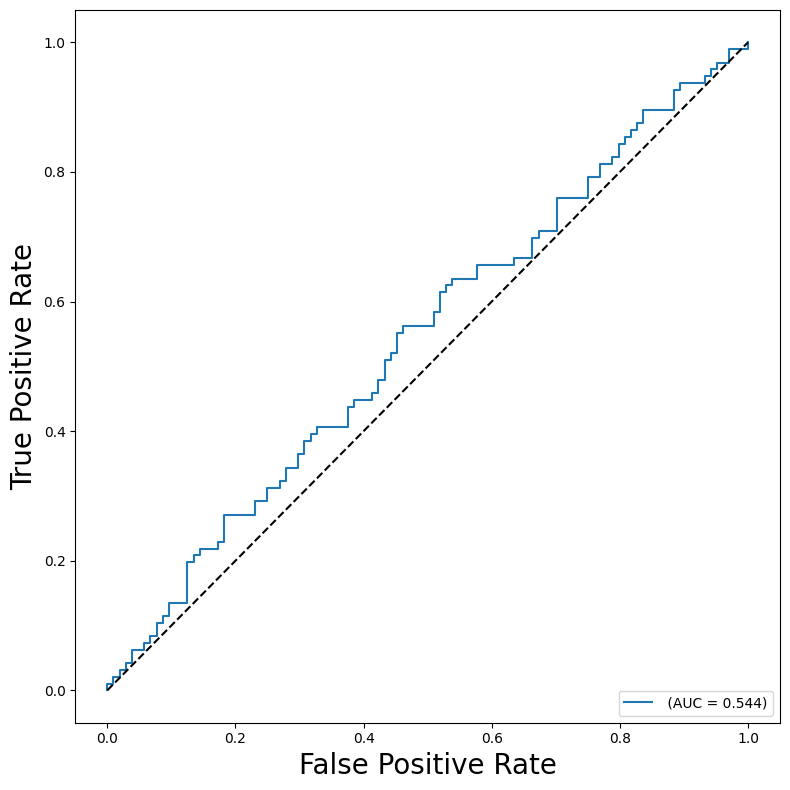

In [153]:
eu.pl.auroc(
    sdata_val,
    target_keys="label_0",
    prediction_keys="label_0_predictions"
)
plt.show()